# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [3]:
# Lets import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/SeoulBikeData (1).csv', encoding = 'unicode_escape')

# **EDA**

In [7]:
# check top 5 rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
#check last 5 rows 
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
df.shape  

(8760, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
# to know stastical summary of given data 
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
#to know different column in given data 
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [13]:
# hence column name have unit attached with them we need to rename columns to simplify our process
df = df.rename(columns={'Temperature(°C)':'Temperature',
                         'Visibility (10m)':'Visibility',
                       'Humidity(%)':'Humidity', 
                       'Wind speed (m/s)':'Wind_speed',
                       'Dew point temperature(°C)':'Dew_point_temp',
                       'Rented Bike Count':'Rented_Bike_Count',
                       'Solar Radiation (MJ/m2)':'Solar_Radiation ',
                       'Rainfall(mm)':'Rainfall',
                        'Snowfall (cm)':'Snowfall',
                        'Functioning Day':'Functioning_Day'})
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [14]:
#checking for null values 
df.isna().sum()

Date                 0
Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Dew_point_temp       0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
dtype: int64

In [15]:
#check for duplicates 
df.duplicated().sum()

0

In [16]:
# converting date column dtype object to date 
df['Date']=pd.to_datetime(df['Date'])

In [17]:
# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [18]:
# drop the date column 
df.drop(columns=['Date'], inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Humidity           8760 non-null   int64  
 4   Wind_speed         8760 non-null   float64
 5   Visibility         8760 non-null   int64  
 6   Dew_point_temp     8760 non-null   float64
 7   Solar_Radiation    8760 non-null   float64
 8   Rainfall           8760 non-null   float64
 9   Snowfall           8760 non-null   float64
 10  Seasons            8760 non-null   object 
 11  Holiday            8760 non-null   object 
 12  Functioning_Day    8760 non-null   object 
 13  day_of_week        8760 non-null   object 
 14  month              8760 non-null   object 
 15  year               8760 non-null   object 
dtypes: float64(6), int64(4),

## As we can see in our data there are 6 categorical values [holiday, unctioning_day, day_of_the_week,month, year]
## We observe that 'hour' is numerical data but it is a timestamp so we have treat "hour" column as categorical data 

In [20]:
df['Hour']=df['Hour'].astype('object')
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,day_of_week,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017


In [21]:
# Unique values 
df.apply(lambda x: len(x.unique()))

Rented_Bike_Count    2166
Hour                   24
Temperature           546
Humidity               90
Wind_speed             65
Visibility           1789
Dew_point_temp        556
Solar_Radiation       345
Rainfall               61
Snowfall               51
Seasons                 4
Holiday                 2
Functioning_Day         2
day_of_week             7
month                  12
year                    2
dtype: int64

In [22]:
df['weekend_weekdays'] = df['day_of_week'].apply(lambda x : 1 if x == 'Saturday' or x == 'Sunday' else 0)


In [23]:
# converting columns to categorical data 
clm = ['Hour','Seasons', 'Holiday', 'Functioning_Day','weekend_weekdays','day_of_week','month','year']
for clm in clm:
  df[clm] = df[clm].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Dew_point_temp     8760 non-null   float64 
 7   Solar_Radiation    8760 non-null   float64 
 8   Rainfall           8760 non-null   float64 
 9   Snowfall           8760 non-null   float64 
 10  Seasons            8760 non-null   category
 11  Holiday            8760 non-null   category
 12  Functioning_Day    8760 non-null   category
 13  day_of_week        8760 non-null   category
 14  month              8760 non-null   category
 15  year               8760 non-null   category
 16  weeken

In [24]:
#Converting Data into categorical and numerical values 
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='category')
categorical_features=df.select_dtypes(include='category')
numeric_features.head()


,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Radiation,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [25]:
categorical_features.head()

,Hour,Seasons,Holiday,Functioning_Day,day_of_week,month,year,weekend_weekdays
0,0,Winter,No Holiday,Yes,Thursday,January,2017,0
1,1,Winter,No Holiday,Yes,Thursday,January,2017,0
2,2,Winter,No Holiday,Yes,Thursday,January,2017,0
3,3,Winter,No Holiday,Yes,Thursday,January,2017,0
4,4,Winter,No Holiday,Yes,Thursday,January,2017,0


[Text(0.5, 1.0, 'Bike counts during Week')]

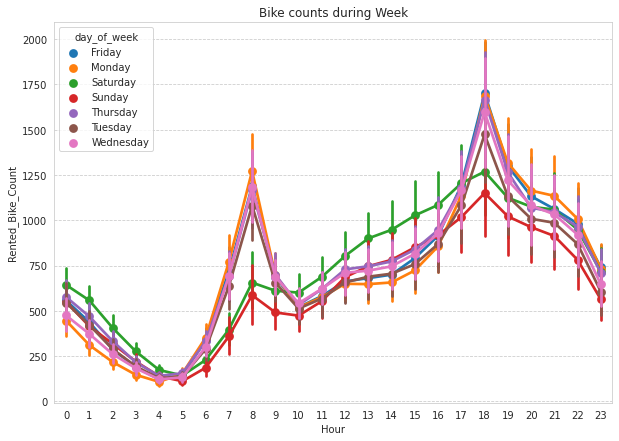

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
sns.pointplot(data = df, x = 'Hour', y ='Rented_Bike_Count', hue='day_of_week', ax = ax).set(title= 'Bike counts during Week')


[Text(0.5, 1.0, 'Bike counts during different Seasons')]

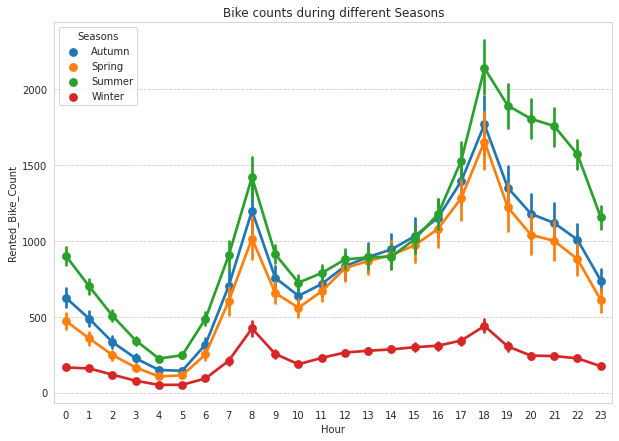

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
sns.pointplot(data = df, x = 'Hour', y ='Rented_Bike_Count', hue='Seasons', ax = ax).set(title= 'Bike counts during different Seasons')

[Text(0.5, 1.0, 'Bike counts during Weekend and Weekdays ')]

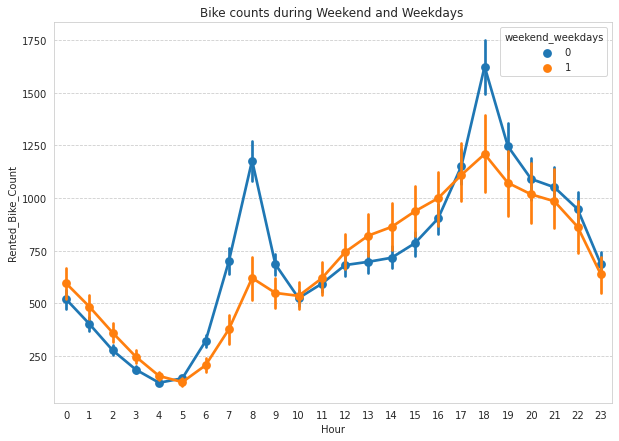

In [28]:
fig, ax = plt.subplots(figsize=(10,7))
sns.pointplot(data = df, x = 'Hour', y ='Rented_Bike_Count', hue='weekend_weekdays', ax = ax).set(title = 'Bike counts during Weekend and Weekdays ')
# 1 is weekend and 0 is weekday 

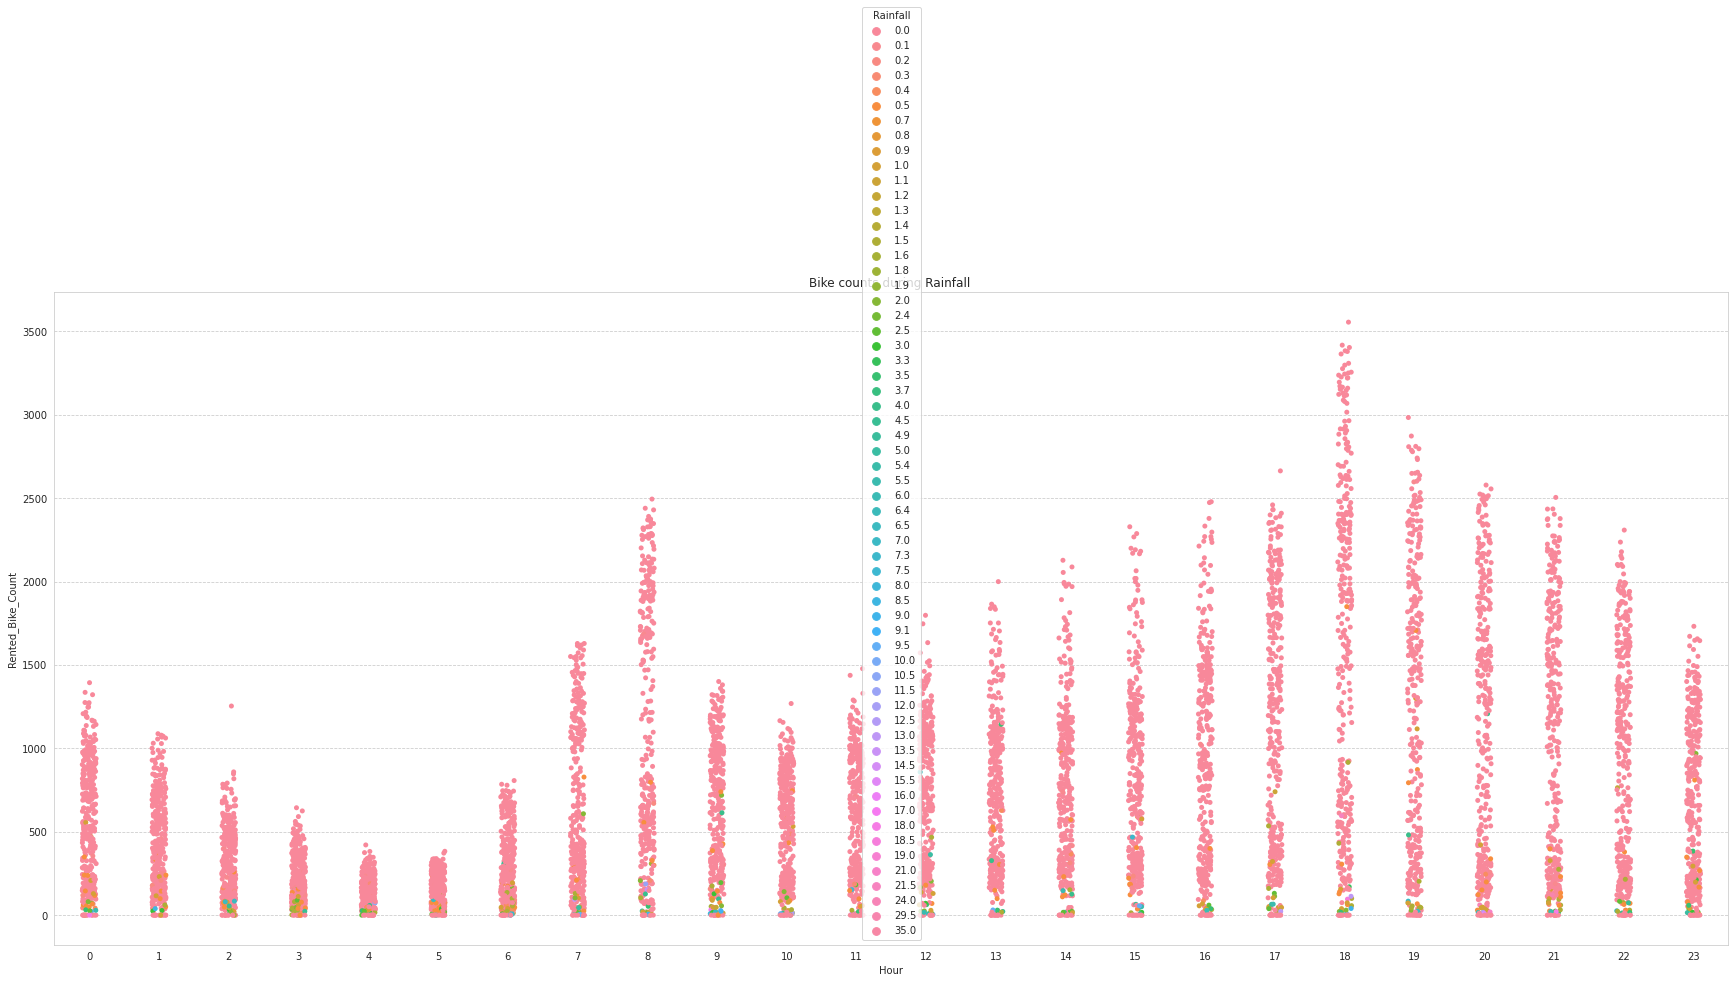

In [29]:
fig, ax = plt.subplots(figsize=(30,12))
sns.stripplot(data = df, x = 'Hour', y ='Rented_Bike_Count', hue='Rainfall', ax = ax).set(title = 'Bike counts during Rainfall ')
sns.move_legend(ax, 'right center')

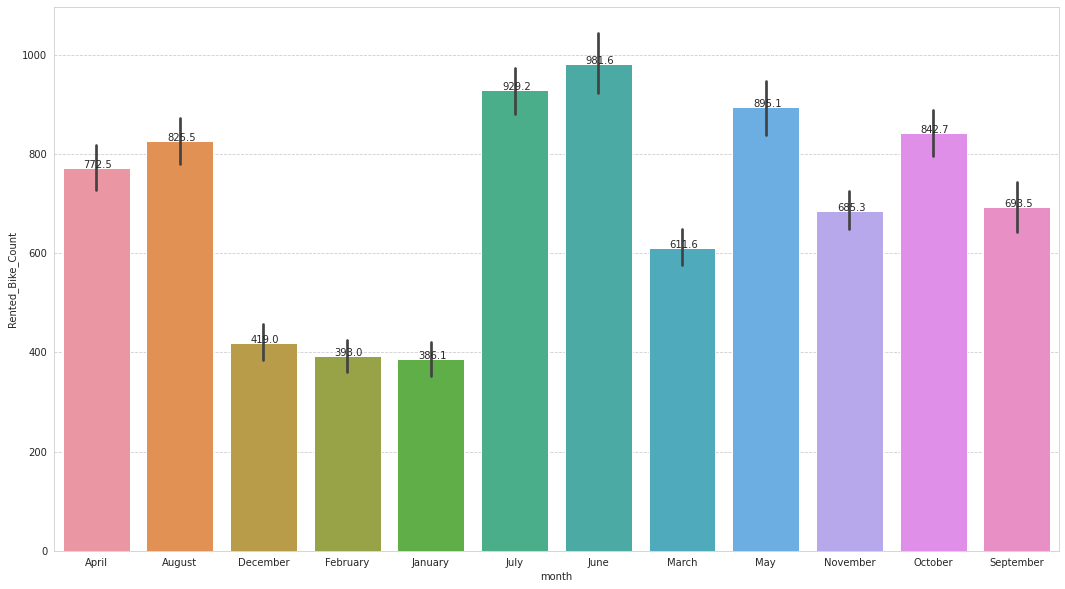

In [30]:
fig, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(data = df, x = 'month', y ='Rented_Bike_Count', ax = ax)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

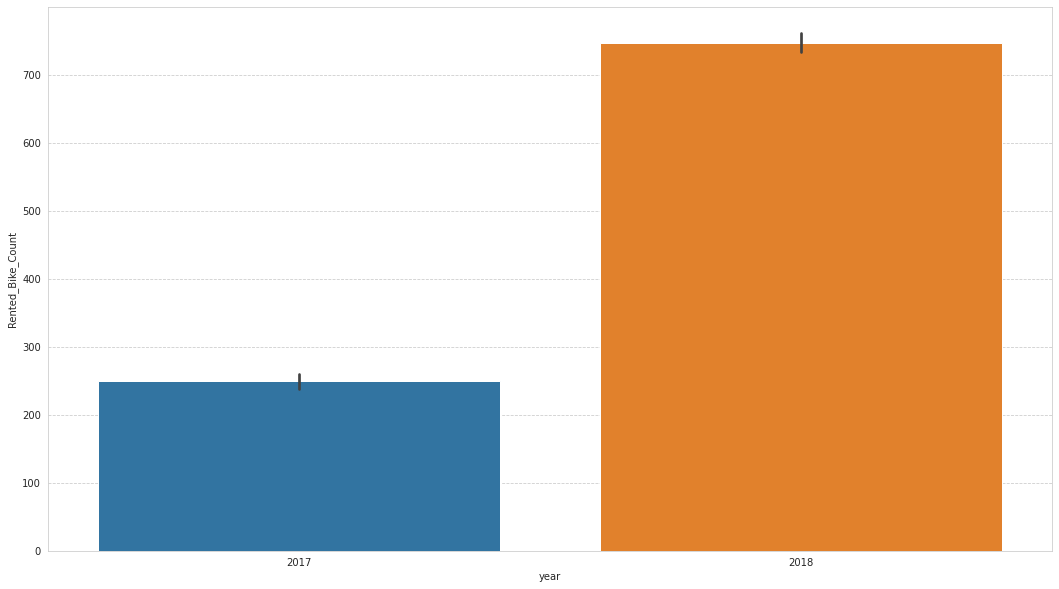

In [31]:
fig, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(data = df, x = 'year', y ='Rented_Bike_Count', ax = ax)

# **Observations**
1. In plot Bike counts during week with hourly distribution tells us, bike demand saw spike at hour 7 to 10 am and at 6 to 9 pm, it also tells us on sunday demand is low compare to other days in week.
2. In plot of Bike counts during seasons, Winter season saw lowest demand and demand spiked in summer season.
3. In plot of bike counts vs weekday and weekends, on weekends demand got little traction compare to weekdays, maybe this fluctuation due to office hours.
4. In strip plot we can see ther is bike demand still in light rain which is 0 to 0.4 cm, and it got much lowered when rainfall exceed 1 cm. 
5. In plot of Bike count during months , it is clearly visible that in month of July and june there was higher Demand and in month of january it is lowest, it corelates with season plot as month of january is month of cold.
6. In plot of Bike count during year, in year 2017 people maybe dont know about bikes. 


# **Checking Outliers**

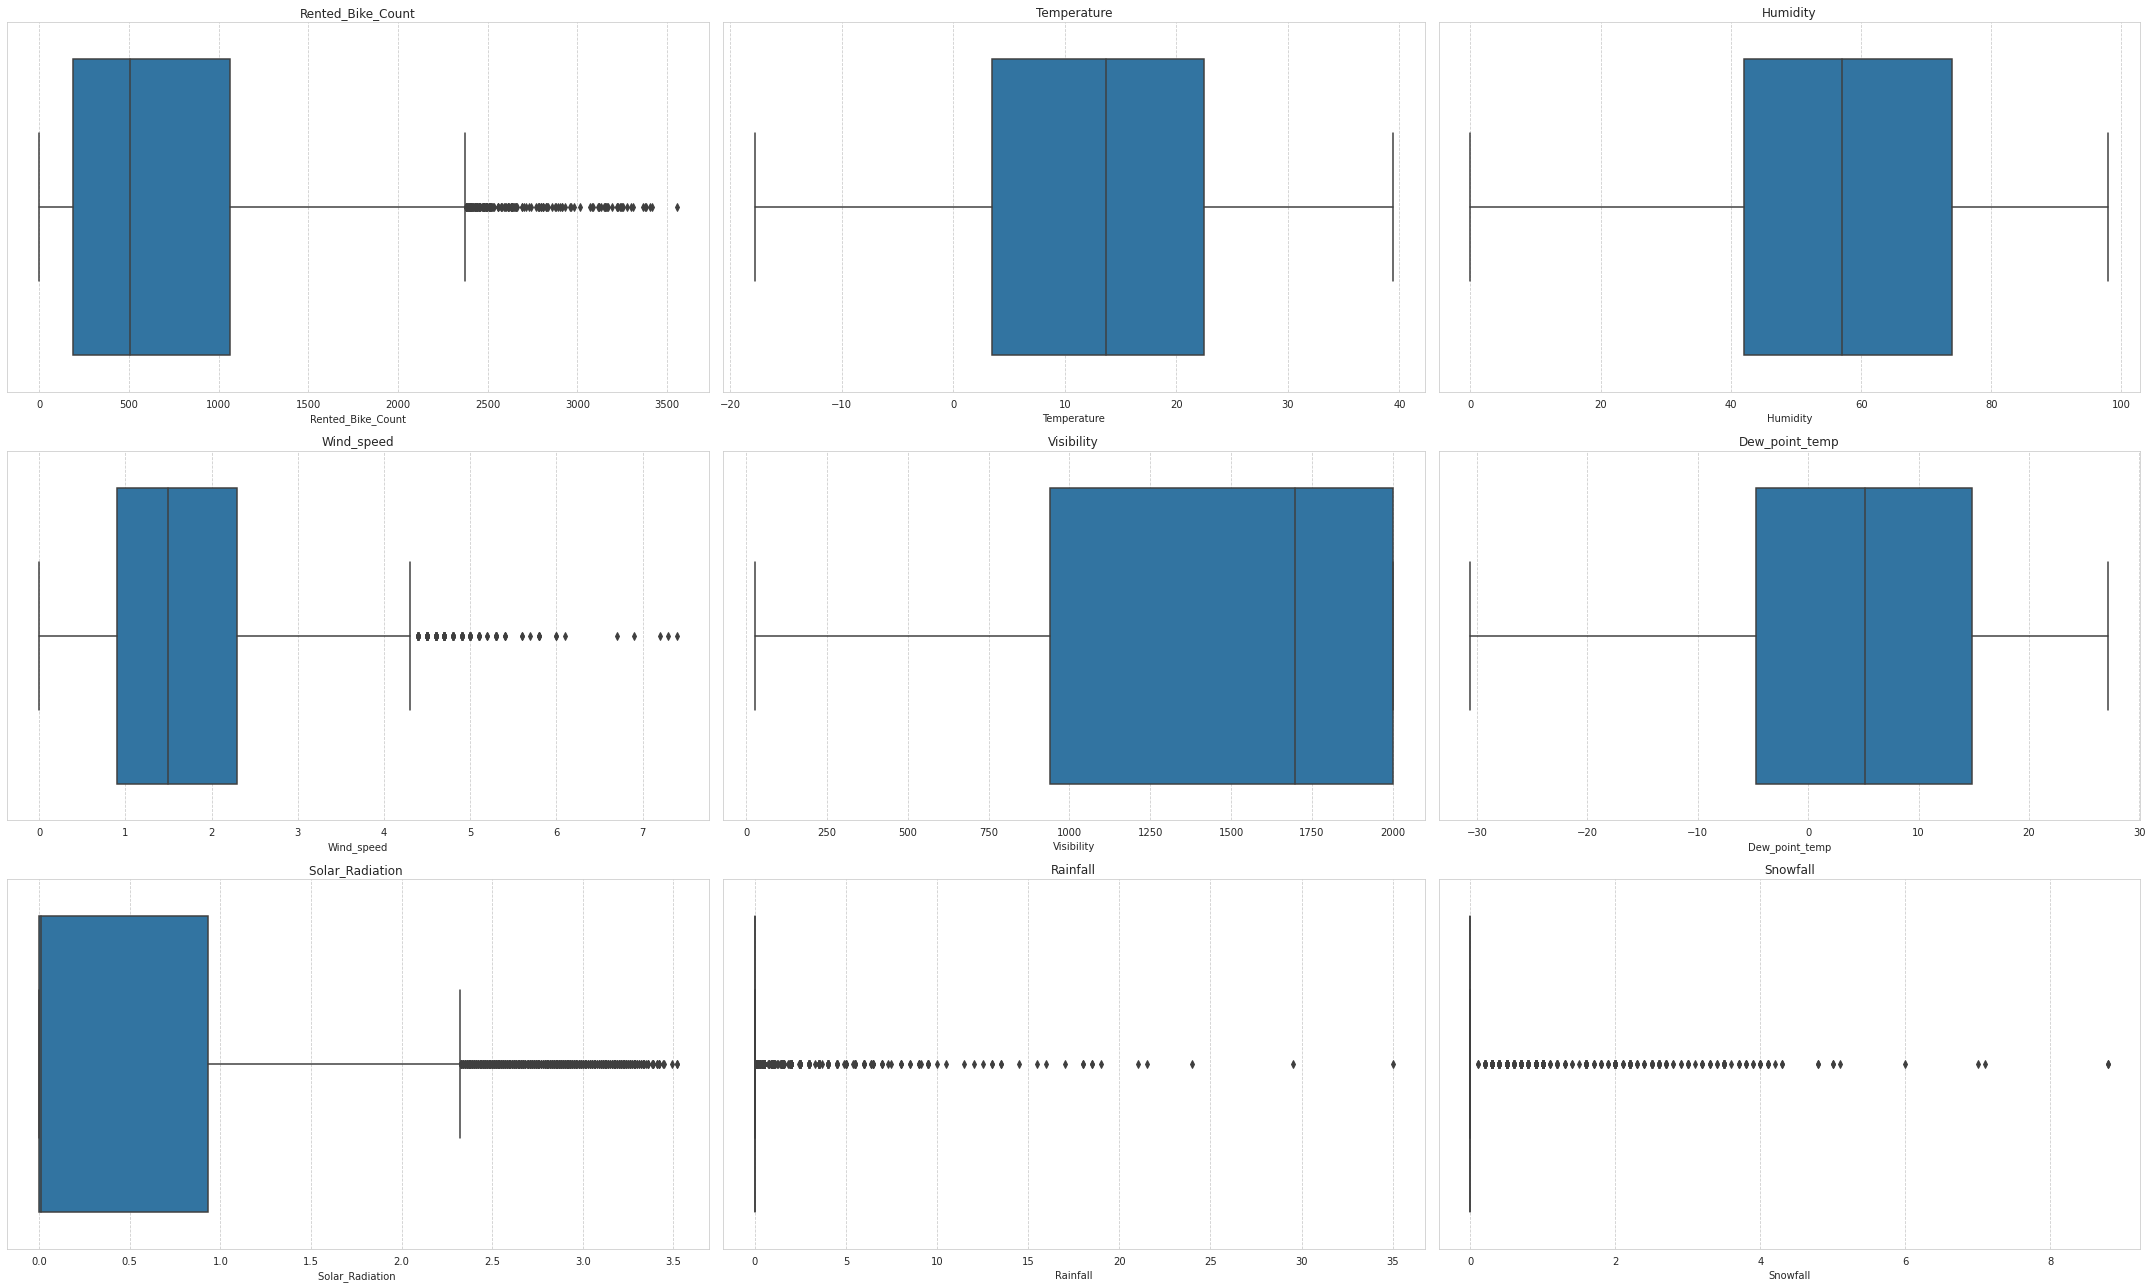

In [32]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(30,18))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

# **Lets take a visualization of value counts**
Our dependent variable is "Rented Bike Count" so we need to analyse this column with other columns by using some visualisation plot.



====================================================================== Hour ======================================================================




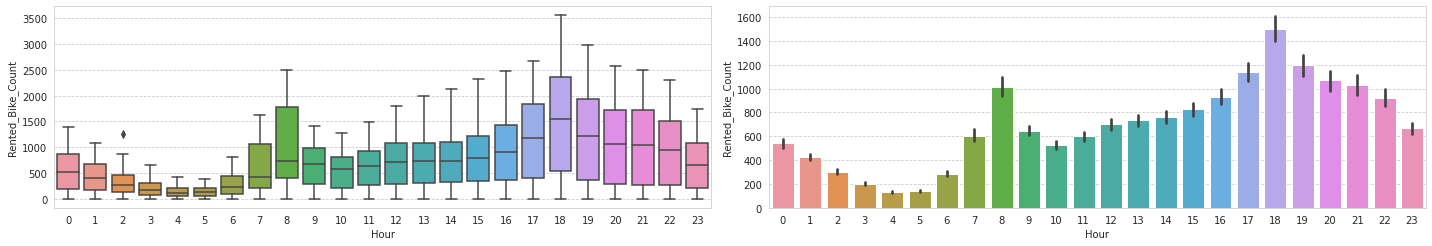



====================================================================== Seasons ======================================================================




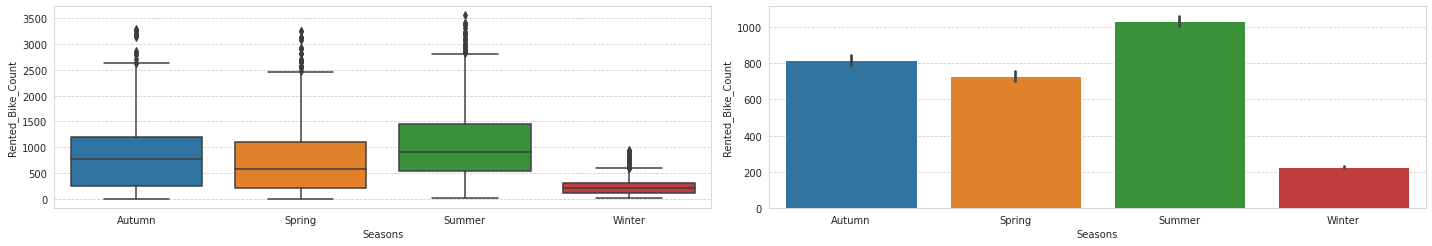



====================================================================== Holiday ======================================================================




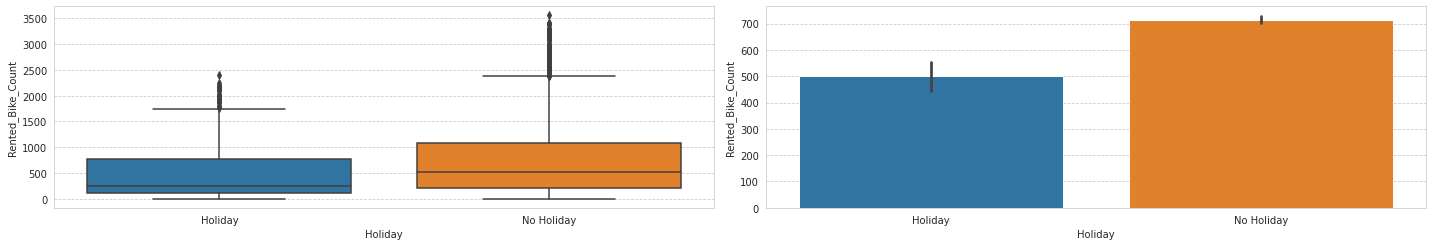



====================================================================== Functioning_Day ======================================================================




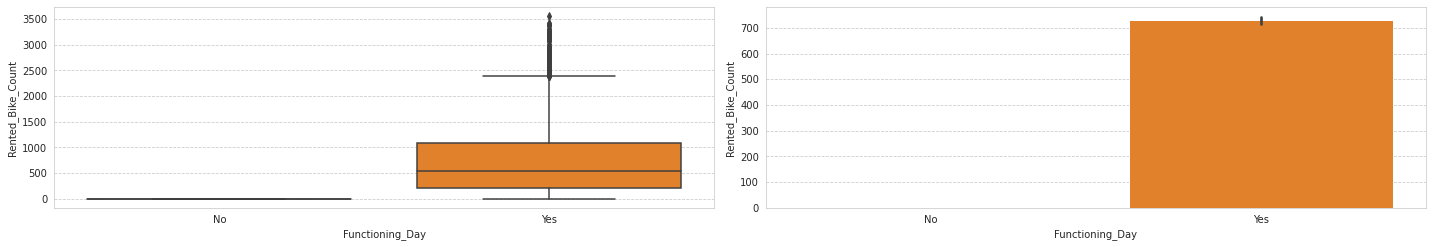



====================================================================== day_of_week ======================================================================




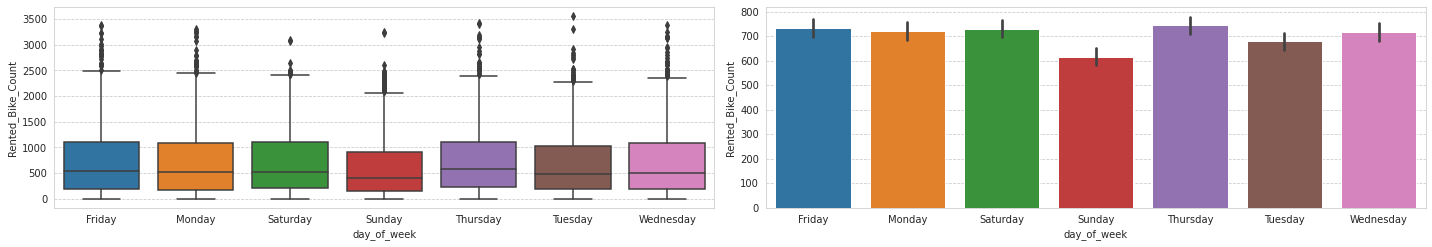



====================================================================== month ======================================================================




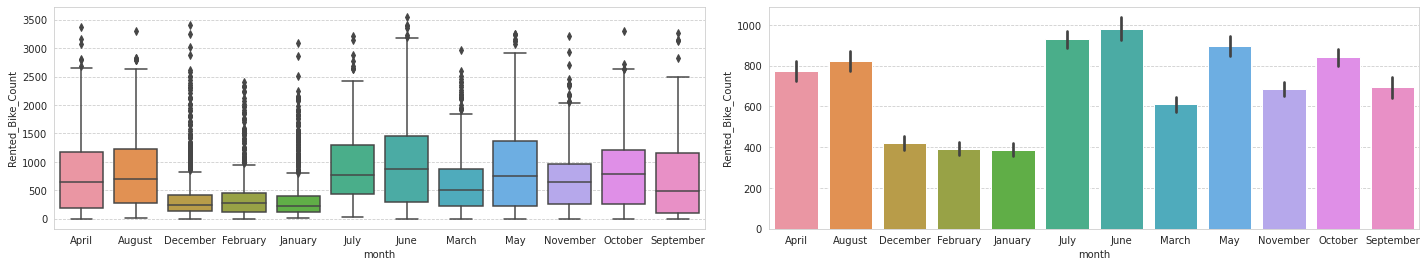

ValueError: ignored

<Figure size 1440x1440 with 0 Axes>

In [33]:
# creating boxplot plot and bar plot
n=1
for i in categorical_features.columns:
  plt.figure(figsize=(20,20))
  plt.subplot(6,2,n)
  n += 1
  print('\n')
  print('='*70,i,'='*70)
  print('\n')
  sns.boxplot(x=df[i],y=df["Rented_Bike_Count"])
  plt.subplot(6,2,n)
  n+= 1
  sns.barplot(df[i],df['Rented_Bike_Count'])
  plt.tight_layout()
  plt.show()



*   From the above bar plots we can see that the use of rented bike in funtioning day and shows that peoples dont use rented bike in no funtioning day. 
*   Looking at the holiday column bar plot we can say that as compare to no holiday the more numbers of bike rented in holidays.



## Correlation Check 

In [34]:
# Correlation with Rented Bike Count
df.corr()['Rented_Bike_Count']

Rented_Bike_Count    1.000000
Temperature          0.538558
Humidity            -0.199780
Wind_speed           0.121108
Visibility           0.199280
Dew_point_temp       0.379788
Solar_Radiation      0.261837
Rainfall            -0.123074
Snowfall            -0.141804
Name: Rented_Bike_Count, dtype: float64

Some features are negatively correlated and some are positive.

**Coorelation Matrix**

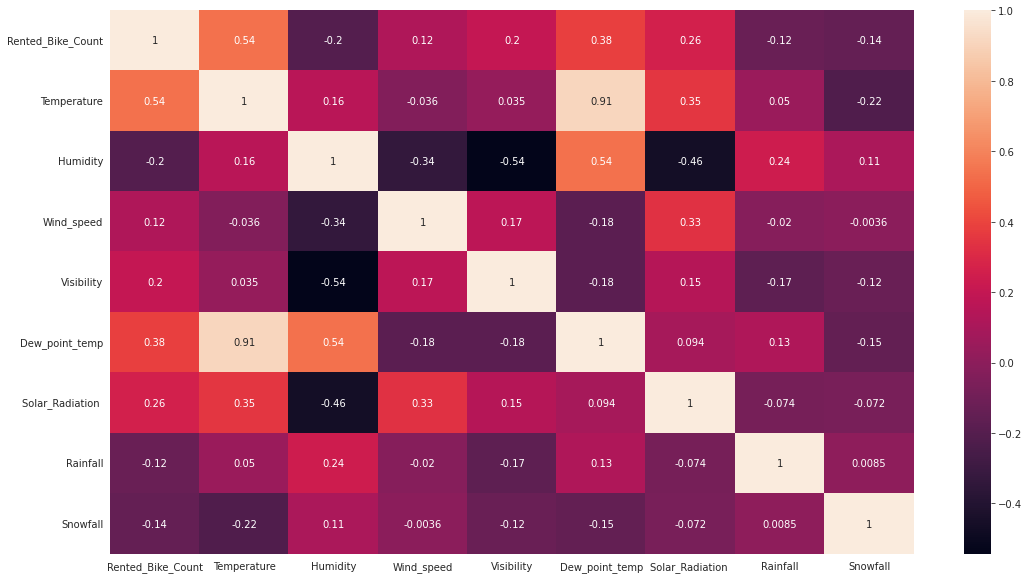

In [35]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(corr, annot = True, ax = ax)

1. From this graph we are able to see that
these temperature(°C) and dev point temperature(°C) column are highly correlated i.e 0.91.
2. We need to drop this column then it will not affect the outcome of our analysis and also having same variation.

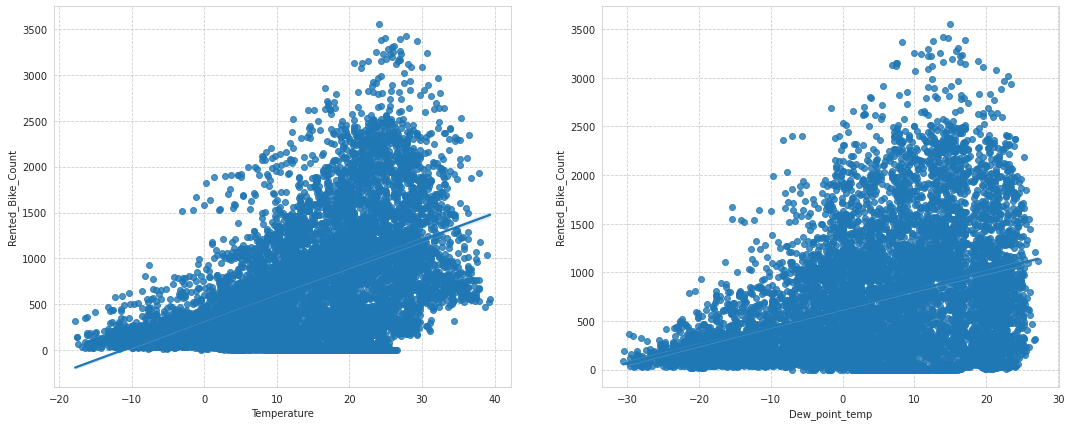

In [36]:
# to get clear idea between temprature and dew point temprature we are plottting regression plot 
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (18,7))
sns.regplot(x = df['Temperature'], y = df['Rented_Bike_Count'], ax = ax1)
sns.regplot(x = df['Dew_point_temp'], y = df['Rented_Bike_Count'], ax = ax2)

This both paramater are coorelating to Rented Bike count silimarly

In [38]:
#Drop the deve point temprature column 
df.drop('Dew_point_temp', axis = 1)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,day_of_week,month,year,weekend_weekdays
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,2018,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,2018,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,2018,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,2018,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Dew_point_temp     8760 non-null   float64 
 7   Solar_Radiation    8760 non-null   float64 
 8   Rainfall           8760 non-null   float64 
 9   Snowfall           8760 non-null   float64 
 10  Seasons            8760 non-null   category
 11  Holiday            8760 non-null   category
 12  Functioning_Day    8760 non-null   category
 13  day_of_week        8760 non-null   category
 14  month              8760 non-null   category
 15  year               8760 non-null   category
 16  weeken

# **Multicollinearity**

Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. 

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [40]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Dew_point_temperature(°C)']]])

,variables,VIF
0,Temperature,29.075866
1,Humidity,5.069743
2,Wind_speed,4.517664
3,Visibility,9.051931
4,Dew_point_temp,15.201989
5,Solar_Radiation,2.821604
6,Rainfall,1.079919
7,Snowfall,1.118903


In [41]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,day_of_week,month,year,weekend_weekdays
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0


# **Skewness**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Dew_point_temp     8760 non-null   float64 
 7   Solar_Radiation    8760 non-null   float64 
 8   Rainfall           8760 non-null   float64 
 9   Snowfall           8760 non-null   float64 
 10  Seasons            8760 non-null   category
 11  Holiday            8760 non-null   category
 12  Functioning_Day    8760 non-null   category
 13  day_of_week        8760 non-null   category
 14  month              8760 non-null   category
 15  year               8760 non-null   category
 16  weeken



====================================================================== Rented_Bike_Count ======================================================================




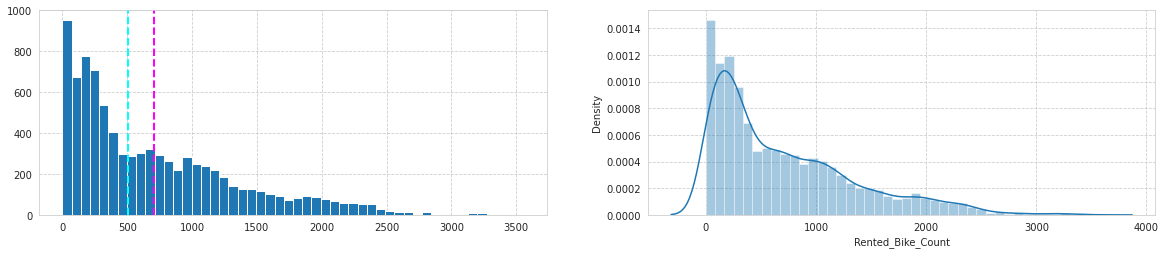



====================================================================== Temperature ======================================================================




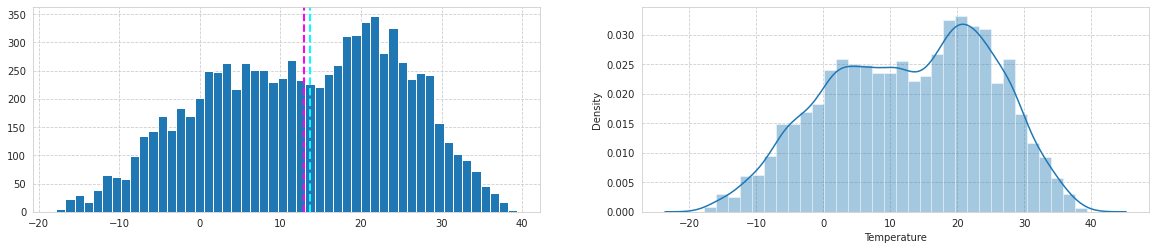



====================================================================== Humidity ======================================================================




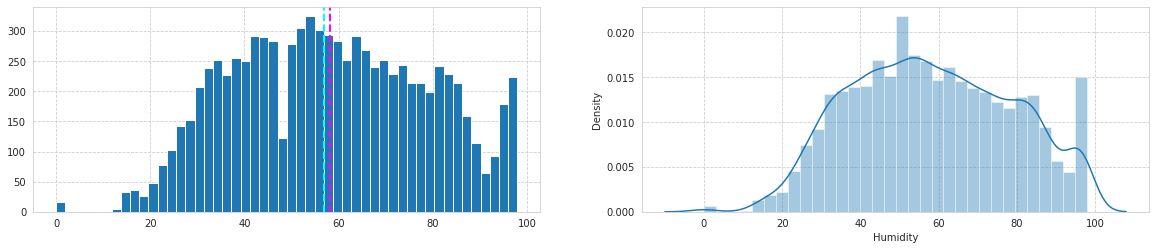



====================================================================== Wind_speed ======================================================================




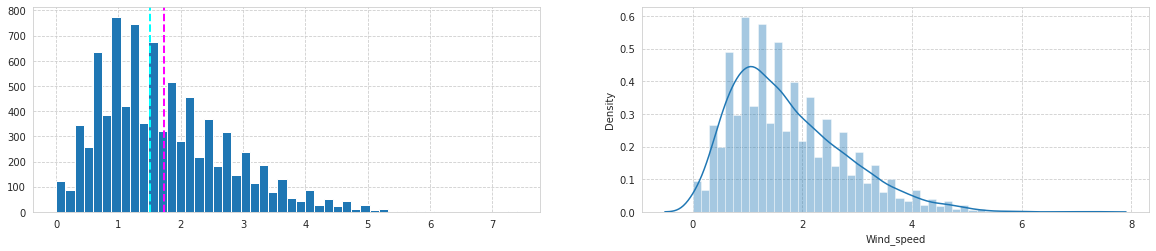



====================================================================== Visibility ======================================================================




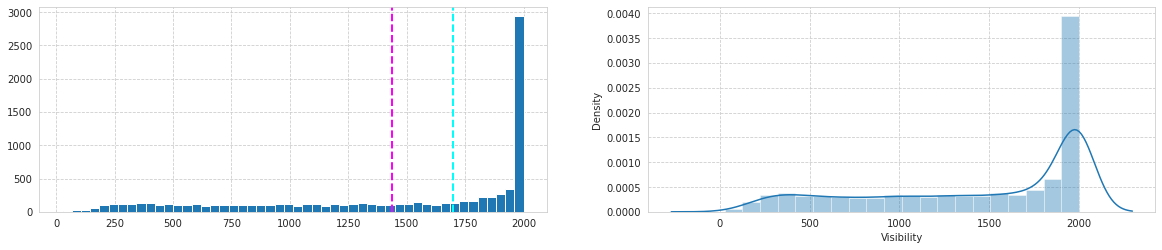



====================================================================== Dew_point_temp ======================================================================




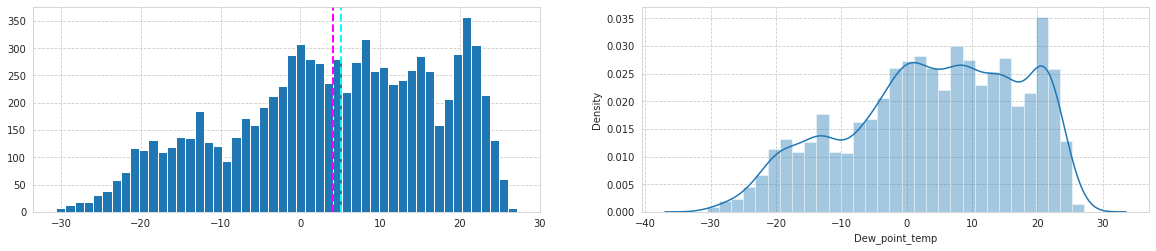



====================================================================== Solar_Radiation  ======================================================================




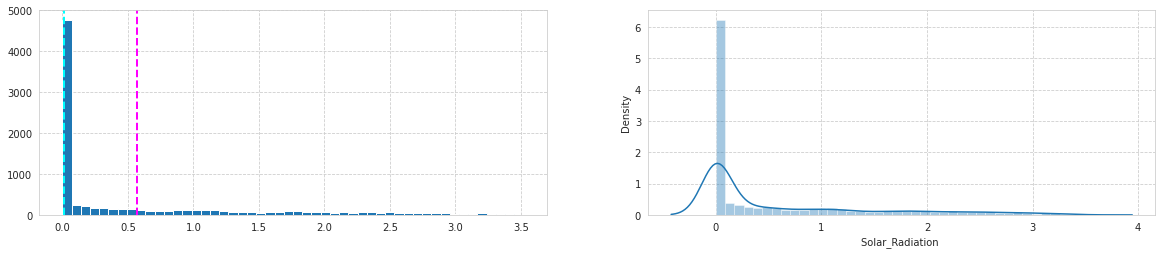



====================================================================== Rainfall ======================================================================




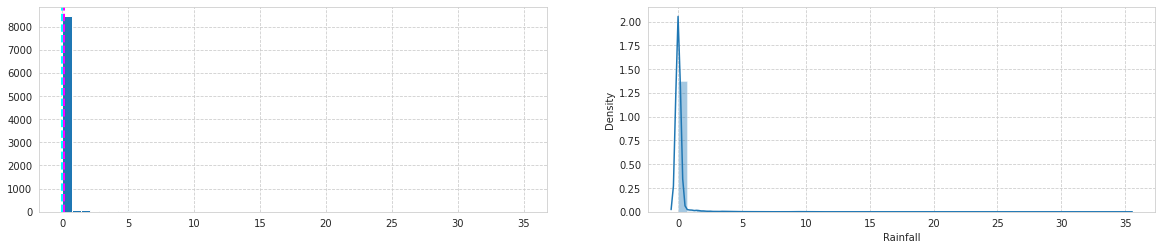



====================================================================== Snowfall ======================================================================




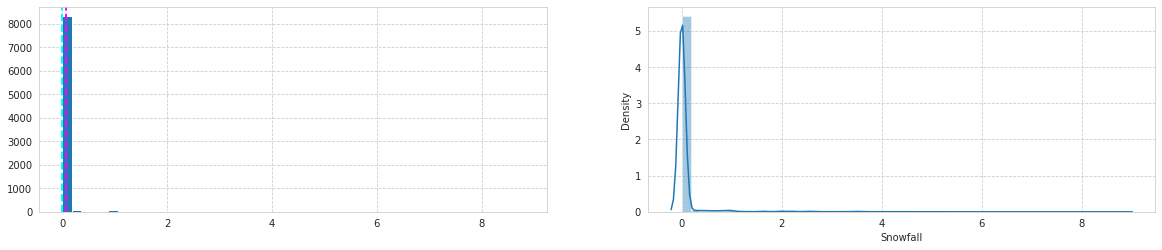

In [43]:
#plotting histogram with mean and median, and distplot of all the numeric features of the dataset
n=1
for i in numeric_features.columns:
  plt.figure(figsize=(20,40))
  plt.subplot(9,2,n)
  n+=1
  print('\n')
  print('='*70,i,'='*70)
  print('\n')
  # fig=plt.figure()
  # ax=fig.gca()
  feature = df[i]
  feature.hist(bins=50,)
  plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
  plt.subplot(9,2,n)
  n+= 1
  sns.distplot(df[i])
  # plt.tight_layout()
  plt.show()


From tha above plots we can conclude that:
1.  People like to ride bikes when it is pretty hot around 20-30 degree celsius. 
2.  The amount of rented bike if more , when there is a solar radiation
3.  People are rented bike specially when there is no rainfall or ver little rainfall.
4. people don't rent bike whenever there is a snowfall.
5. The demand of rented bike increases when it is little windy that means they love to ride in when it is little windy.



# One Hot Encoding 

In [44]:
# Creating Dummy variables 
new_df = pd.get_dummies(df, drop_first = True, sparse = True)

# **Normalization**

Text(0.5, 1.0, 'Square root')

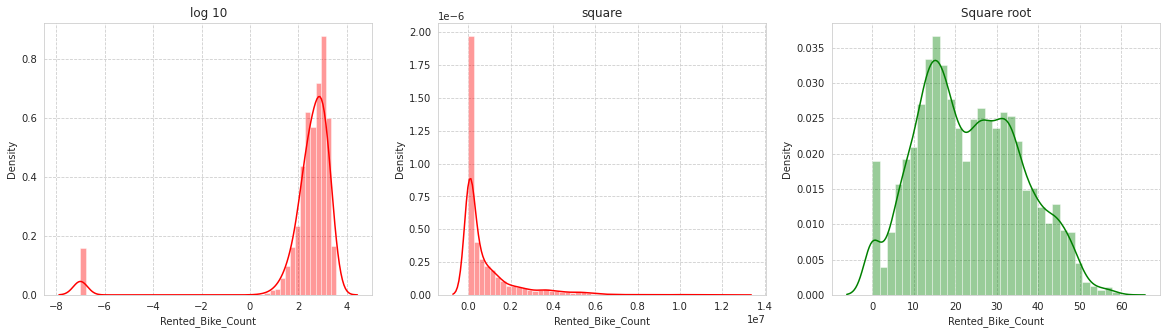

In [45]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
# here we use log10 
sns.distplot(np.log10(new_df['Rented_Bike_Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
# here we use square 
sns.distplot((new_df['Rented_Bike_Count']**2),ax=axes[1],color='red').set_title("square")
# here we use square root 
sns.distplot(np.sqrt(new_df['Rented_Bike_Count']),ax=axes[2], color='green').set_title("Square root")

Square root plot is some what better normalize than other two so will go with square root on our dependant variable.

# **MODEL TRAINING**


**TRAIN TEST SPLIT**

In [47]:
x = new_df.drop(columns=['Rented_Bike_Count','Dew_point_temp'])
y = np.sqrt(new_df['Rented_Bike_Count'])

In [49]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=0)

In [50]:
X_train.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018,weekend_weekdays_1
8639,3.8,83,1.1,390,0.00,0.0,0.4,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3614,24.0,47,2.3,520,2.87,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1387,-7.1,33,2.0,1887,0.00,0.0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3900,12.3,97,0.8,238,0.14,2.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8044,3.6,70,0.8,1934,0.00,0.0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [51]:
X_test.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018,weekend_weekdays_1
4059,10.7,73,1.3,2000,0.00,0.0,0.0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
6914,21.7,78,1.0,2000,0.00,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
233,3.6,65,4.3,1061,0.03,0.0,0.4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
982,-9.7,51,2.8,2000,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5967,33.6,58,3.6,1448,1.98,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [52]:
y_train.head()

8639    19.467922
3614    32.480764
1387    11.045361
3900     3.316625
8044    12.124356
Name: Rented_Bike_Count, dtype: float64

In [53]:
y_test.head()

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
Name: Rented_Bike_Count, dtype: float64

# **Evaluation Metrics **
Defining a function to train and evaluate the model with Diffrent parameters like MSE , RMSE, R2 Score, Best_params, Best score, Coefficient , intercept and feature importance



In [54]:
# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model
    
  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any 
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass
    

  #predicting the Test set and evaluting the models 

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')
  
  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:
      
      # ploting the graph of feature importance
      
      best = model.best_estimator_
      features = X_train.columns
      importances = best.feature_importances_
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='red', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()
    
    except:
      pass
  
  # Here we appending the parameters for all models 
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values  
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

# transforming X_train and X_test with yeo-johnson transformation

In [55]:
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
yeo = PowerTransformer()
X_train_trans = yeo.fit_transform(X_train) # fit transform the training set
X_test_trans = yeo.transform(X_test) #tranform the test set

# **Linear Regression **

Training score  = 0.7958391074506168
MAE : 4.361347403819784
MSE : 31.99581735808781
RMSE : 5.656484540603626
R2 : 0.7974517575854394
Adjusted R2 :  0.792328757543104 

********************************************************************************
coefficient 
 [ 4.98156799e+00 -1.42488464e+00 -1.62814897e-01  3.37211105e-01
  3.21181926e+00 -3.04428200e+00  3.76985502e-02 -5.01823430e-01
 -1.10681340e+00 -1.41168052e+00 -2.01552167e+00 -1.89117957e+00
 -9.30523379e-01  5.43800501e-02  8.81656063e-01 -5.50950819e-01
 -1.56731287e+00 -1.62178988e+00 -1.35563475e+00 -1.41624348e+00
 -1.38099970e+00 -1.12042485e+00 -6.96548766e-01  1.93963988e-01
  1.67151395e+00  1.28395596e+00  1.18575508e+00  1.31741071e+00
  9.90236225e-01  2.46884997e-01 -1.20982079e+00 -1.36363714e+00
 -3.32820472e+00  6.41416861e-01  4.89893353e+00 -1.15520946e-01
 -5.21698295e+12 -5.20560942e+12 -2.19889491e-01 -2.70953405e-01
 -1.08033499e-01 -3.41167171e-01 -8.44372149e-02 -2.19434607e-01
 -3.23337674e-02 -3.6

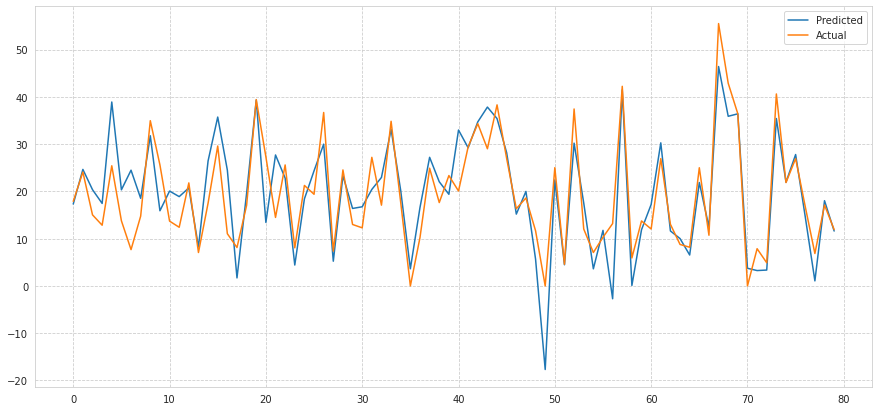

In [56]:
# importing Fitting the linear regression model with our score matrix function 
LR_df = score_metrix(LinearRegression(),X_train_trans,X_test_trans,y_train,y_test)

# **Regularization**

### Lasso with hyperparameter tuning

In [57]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters 
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

Training score  = 0.795838012666293
The best parameters found out to be :{'alpha': 0.0014} 
where model best score is:  0.7910292318169213 

MAE : 4.361578766882041
MSE : 31.99412551074608
RMSE : 5.656334989261693
R2 : 0.7974624677573867
Adjusted R2 :  0.7923397386046461 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


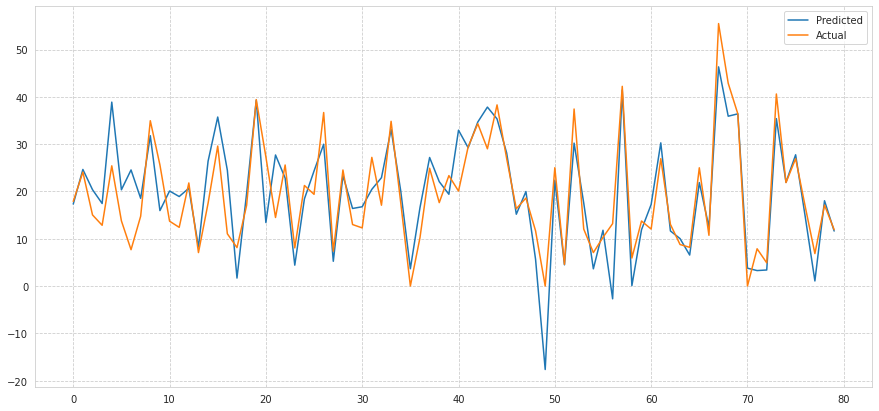

In [58]:
# fit and evaluate model with score_matrix function
score_metrix(lasso_cv,X_train_trans,X_test_trans,y_train,y_test)

Here our r2 score 0.72 and model capture moderate level of data variance. We need to improve r2 score.

#**Ridge with hyperparameter tuning**

Training score  = 0.7958324512640274
The best parameters found out to be :{'alpha': 10} 
where model best score is:  0.7910303349819561 

MAE : 4.362611970954289
MSE : 31.997403343703226
RMSE : 5.656624730676698
R2 : 0.7974417175669175
Adjusted R2 :  0.7923184635850035 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


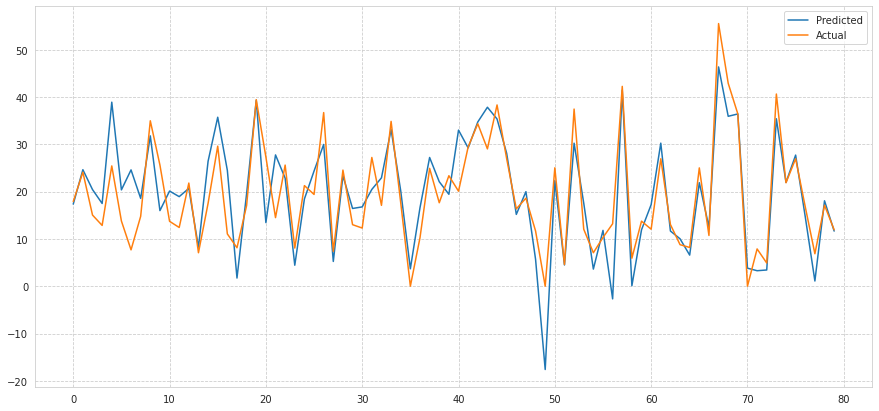

In [59]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters 
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,X_train_trans,X_test_trans,y_train,y_test) # fit and evaluate model with score_matrix function

Looks like our r2 score value is 0.73 that means our model is captured moderate level of the data variance. Lets save it in dataframe for later comparisons.

# Polynomial

In [60]:
# importing polynominal features from sklearn
from sklearn.preprocessing import PolynomialFeatures

In [61]:
poly = PolynomialFeatures(2) #creating variable with degree 2
poly_X_train = poly.fit_transform(X_train_trans) # fit the train set
poly_X_test = poly.transform(X_test_trans) #transform the test set

Training score  = 0.932005084263528
MAE : 2.6798326148167257
MSE : 14.14376618763262
RMSE : 3.7608198823704146
R2 : 0.9104634536956648
Adjusted R2 :  0.6980038522955475 

********************************************************************************
coefficient 
 [ 6.57968605e+08  2.58094482e+00 -1.58615986e+00 ... -2.39228971e+11
  5.22537547e+10 -7.65232681e+11]


Intercept  =  59621456019.838326


******************** ploting the graph of Actual and predicted only with 80 observation ********************


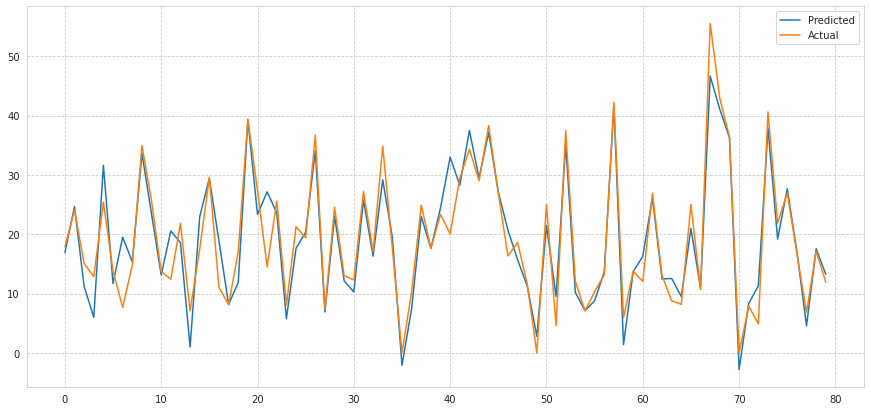

In [62]:
# fit and evaluate model with score_matrix function
score_metrix(LinearRegression(), poly_X_train,poly_X_test,y_train,y_test)

# Train Test split for Tree Base Models
because multicollinearty not effect tree base models

In [64]:
# Split data in X and Y
new_X = new_df.drop(columns='Rented_Bike_Count')
new_y = new_df['Rented_Bike_Count']

In [65]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(new_X,new_y, test_size=0.25,random_state=42)

In [66]:
# Scalling data with yeo-johnson
scaler = PowerTransformer()

In [67]:
X_train  = scaler.fit_transform(X_train) #fitting the X_train
X_test  = scaler.transform(X_test) # transform test set

# Decission Tree
Using Grid Search CV for hyperparameter tuning and try to find best parameters

In [68]:
# imporing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [69]:
# Parameters for Decission Tree model
param_grid = {'criterion' : ["mse"],
              'splitter' : ["best", "random"],
              'max_depth' : [10,15,20,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [70]:

# Using Grid Search 
Dt_grid_search = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=2,n_jobs=-1)

Training score  = 0.8427933935253005
The best parameters found out to be :{'criterion': 'mse', 'max_depth': 20, 'max_features': 35, 'min_samples_split': 50, 'splitter': 'random'} 
where model best score is:  0.782556496420092 

MAE : 171.73861755064112
MSE : 77882.86943116572
RMSE : 279.075024735582
R2 : 0.809670864367715
Adjusted R2 :  0.8047654742740994 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


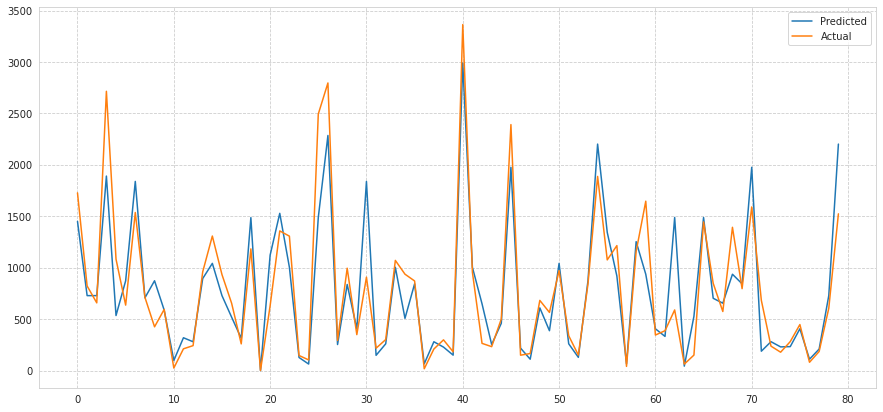

In [71]:
# fit and evaluate model with score_matrix function
score_metrix(Dt_grid_search,X_train,X_test,y_train,y_test)

# RandomForest Regression

In [72]:
# Importing Randomfroest from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

In [73]:
# parameters for Random forest
param_grid = {"n_estimators":[50,100,150],
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [74]:
# Using Grid SearchCV 
Random_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,verbose=2)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Training score  = 0.9570123326813288
The best parameters found out to be :{'max_depth': 25, 'max_features': 35, 'min_samples_split': 10, 'n_estimators': 150} 
where model best score is:  0.8744529190177914 

MAE : 137.79810088593817
MSE : 49496.17739256866
RMSE : 222.47736377566292
R2 : 0.8790418903536175
Adjusted R2 :  0.8759244133008757 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


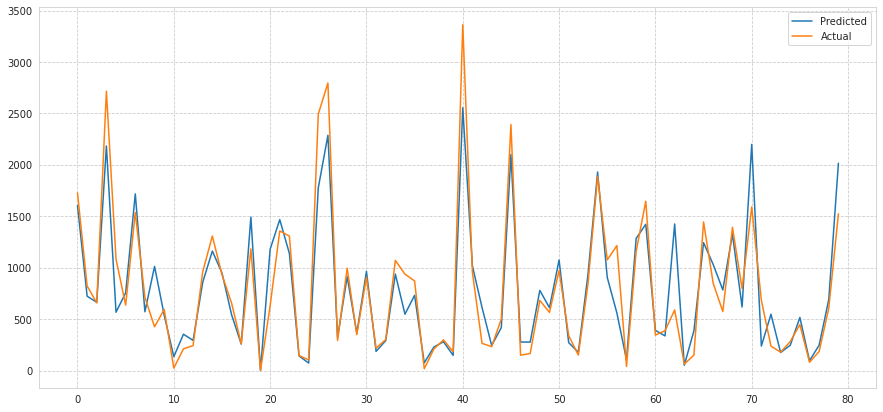

In [75]:
# fit and evaluate model with score_matrix function
score_metrix(Random_forest_Grid_search,X_train,X_test,y_train,y_test)

# Gradient Boosting Regressor

In [76]:
# Importing Gradient Boosting Regressor from sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor 

In [77]:
# parameters for Gradient Boosting Regressor
param_grid = {'learning_rate':[0.15,0.1,0.05,0.02,0.20],
              'n_estimators':[100,150,200,250],
              'max_depth':[2,4,6,10]}

In [78]:
# Using grid search 
gradient_boost_grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, n_jobs=-1, verbose=2)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Training score  = 0.9753981557310301
The best parameters found out to be :{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 250} 
where model best score is:  0.8909195314961942 

MAE : 129.17760210592715
MSE : 43028.64227389496
RMSE : 207.43346469144018
R2 : 0.89484716791721
Adjusted R2 :  0.8921370433789937 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


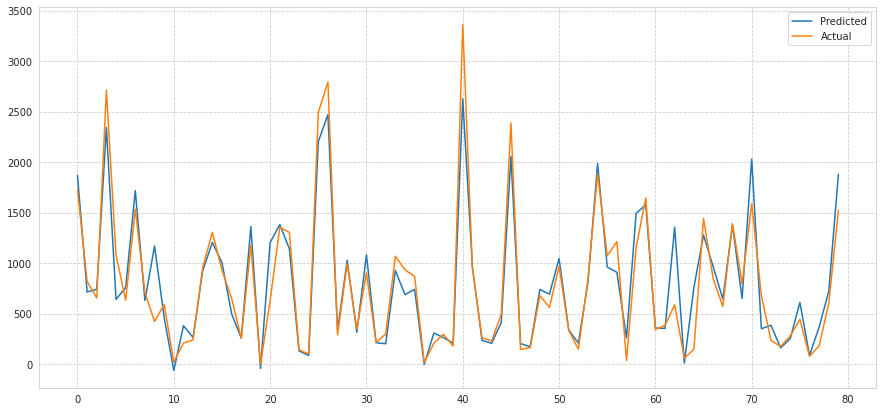

In [79]:
# fit and evaluate model with score_matrix function
score_metrix(gradient_boost_grid_search,X_train,X_test,y_train,y_test)

# XGBoost Regression

In [80]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [81]:

params = {'learning_rate':[0.5,1,1.5,2],'n_estimators':[80,100,150],'max_depth':[15,20,30]}

In [82]:
#creating xgb grid model
xgb_grid_search= GridSearchCV(XGBRegressor(),param_grid=params,)

[21:04:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

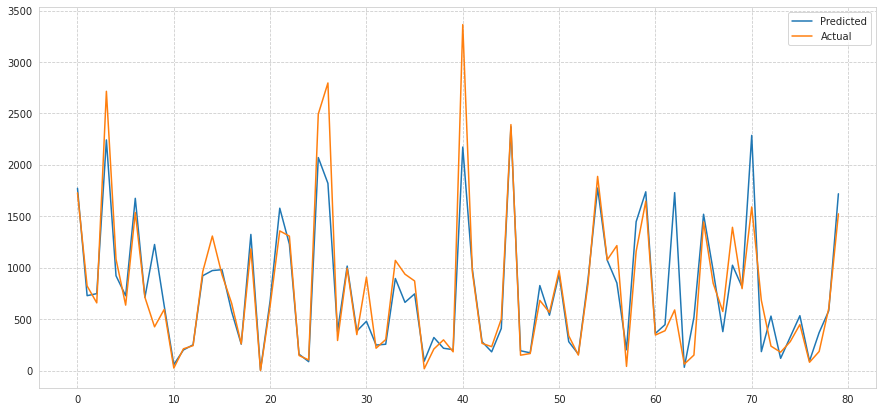

In [83]:
score_metrix(xgb_grid_search,X_train,X_test,y_train,y_test)

# Creating Data Frame of all Evaluation Matrix with respect of models

In [86]:
#creating dictionary to store all the metrices 
all_matrices={'Mean_Absolute_error':mean_absolut_error,'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'Training_score':training_score,'R2':r2_list,'Adjusted_R2':adj_r2_list}


In [88]:
#list of all model name 
model_name=['Linear','Lasso','Ridge','Polynomial','Decision_Tree','Random_Forest','Gradient_Boosting','XG_Boost']

In [89]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_matrices,orient='index',columns=model_name)

In [90]:
matrices_df

,Linear,Lasso,Ridge,Polynomial,Decision_Tree,Random_Forest,Gradient_Boosting,XG_Boost
Mean_Absolute_error,4.361347,4.361579,4.362612,2.679833,171.738618,137.798101,129.177602,134.469099
Mean_square_error,31.995817,31.994126,31.997403,14.143766,77882.869431,49496.177393,43028.642274,51410.688245
Root_Mean_square_error,5.656485,5.656335,5.656625,3.760820,279.075025,222.477364,207.433465,226.739252
Training_score,0.795839,0.795838,0.795832,0.932005,0.842793,0.957012,0.975398,1.000000
R2,0.797452,0.797462,0.797442,0.910463,0.809671,0.879042,0.894847,0.874363
Adjusted_R2,0.792329,0.792340,0.792318,0.698004,0.804765,0.875924,0.892137,0.871125


In [91]:
matrices_df=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [92]:
matrices_df

,Models,Mean_Absolute_error,Mean_square_error,Root_Mean_square_error,Training_score,R2,Adjusted_R2
0,Linear,4.361347,31.995817,5.656485,0.795839,0.797452,0.792329
1,Lasso,4.361579,31.994126,5.656335,0.795838,0.797462,0.792340
2,Ridge,4.362612,31.997403,5.656625,0.795832,0.797442,0.792318
3,Polynomial,2.679833,14.143766,3.760820,0.932005,0.910463,0.698004
4,Decision_Tree,171.738618,77882.869431,279.075025,0.842793,0.809671,0.804765
5,Random_Forest,137.798101,49496.177393,222.477364,0.957012,0.879042,0.875924
6,Gradient_Boosting,129.177602,43028.642274,207.433465,0.975398,0.894847,0.892137
7,XG_Boost,134.469099,51410.688245,226.739252,1.000000,0.874363,0.871125


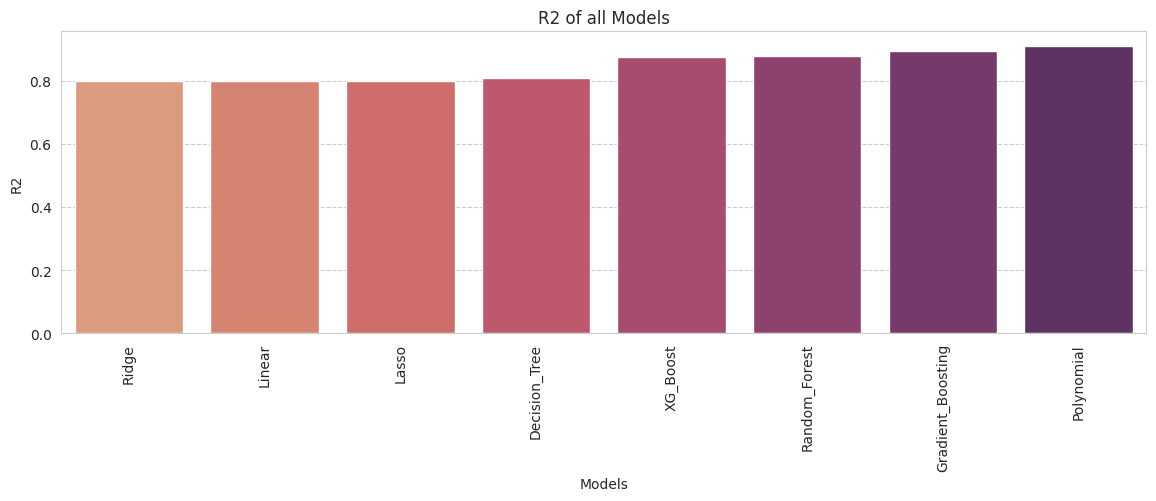

In [93]:
#creating bar plot to visualize the  R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='R2',data=matrices_df.sort_values('R2'),palette="flare").set(title='R2 of all Models')
plt.xticks(rotation=90);

# **Conclusions**

In our analysis, we intially did EDA on all the features of our dataset. We first analysed our dependent variable i.e, 'Rented bike count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. We also analysed numerical variable , check out the correlation, distribution and their relationship with the dependent variable .We also removed some numerical features who had mostly 0 values and do one hot encoding to the categorical variables.



# Model Conclusions

We evaluated different models on the basis of evaluation matrics and comaparing different models are as follows:

1.   Linear Regression
2.   Lasso Regression
3. Ridge REgression
4.ElasticNet Regression
5.Desicion Tree Regressor
6.Random Forest Regressor





# Hyperparameter Tunning



1.  Gradient Boost Regressor
2.  AdaBoost Regressor
3.  XGBoost Regressor






*   In the given dataset there was no strong relationship present between dependent variable "Rented bike count" and independent variables.
*   Beacuse of no relation Linear regression model and its variant model didn't performed well.
*   Out of all models we apply Decision tree and Random forest model are most accurate and the reason is there are no specific relation between features. 
*  Random Forest worked best in predicting the count of rented bikes as its R2 score is maximaun from the tried model.
*   Random forest perfomed best as it is ana ensemble model and result from multiple desision tree is average out to give the best prediction.
* We did hyperparameter tunning to improve our model performance using XGBoost and XGBoost with Grid search CV.
* We are getting best results using Gradient Boost Regressor.

